<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Final Project: BigMart Sales Prediction

_Submitter: Cathy Dai (Data Science Course)_

---



### Chapter 1: Problem Statement

> Come across supply chain, we always want to understand the trends of the sales for products. Here, we have BigMart dataset which have collected in year 2013 for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

> In this project, I would like to use machine learning to build a predictive model and find out the sales of each product at a particular store.



### Chapter 2: Load the data

> I'm going to use the Kaggle dataset. This dataset can be found:
- https://www.kaggle.com/devashish0507/big-mart-sales-prediction

> The dataset contains 8523 observations in products. There are 12 columns of measurements of them.

### 2.1 Import Libraries
> Let's import all of the modules, functions and objects we are going to use.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")


### 2.2 Load data

In [2]:
!head -n 3 ./train.csv

In [3]:
#load the data, remove the first row
kaggle = pd.read_csv('train.csv')
kaggle

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### 2.3 Explore Training Data

In [4]:
kaggle.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
kaggle.index.dtype

dtype('int64')

In [6]:
kaggle.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
6              FDO10       13.650          Regular         0.012741   
7              FDP10          NaN          Low Fat         0.127470   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
10             FDY07       11.800          Low Fat         0.000000   
11             FDA03       18.500          Regular         0.045464   
12             FDX32       15.100          Re

In [7]:
# count the item identifier number 
kaggle.Item_Identifier.value_counts()

FDG33    10
FDW13    10
FDO19     9
FDF56     9
FDX31     9
NCL31     9
NCI54     9
FDF52     9
FDT07     9
FDX04     9
FDV38     9
FDW26     9
NCF42     9
NCJ30     9
FDX20     9
FDP25     9
NCQ06     9
DRE49     9
DRN47     9
FDV60     9
FDD38     9
FDQ40     9
NCY18     9
NCB18     9
FDW49     9
FDU12     9
FDG09     9
NCB31     8
FDZ26     8
FDQ39     8
         ..
FDA48     2
FDB47     2
FDD22     2
FDU09     2
DRL59     2
DRE01     2
NCG19     2
FDI36     2
FDE39     2
FDD48     2
DRC24     2
FDR03     2
FDH22     2
FDM16     2
FDM38     2
NCW30     2
FDR57     2
NCX53     2
FDZ50     2
FDP15     2
FDE38     2
DRF48     1
FDK57     1
FDQ60     1
FDO33     1
FDT35     1
FDE52     1
FDC23     1
FDY43     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

### Chapter 3: Summarize the dataset

> In this chapter, we study the data by looking at the data a few different ways:

- Dimensions of the dataset.
- Peek at the data itself.
- Statistical summary of all attributes.
- Breakdown of the data by the class variable.

In [8]:
# shape
kaggle.shape

(8523, 12)

In [9]:
kaggle.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
# descripe
kaggle.describe(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [38]:
# class distribution
kaggle.groupby('Outlet_Identifier').size()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
dtype: int64

In [12]:
# Locate two measurements
kaggle.loc[:,['Item_MRP','Item_Outlet_Sales']]

,Item_MRP,Item_Outlet_Sales
0,249.8092,3735.1380
1,48.2692,443.4228
2,141.6180,2097.2700
3,182.0950,732.3800
4,53.8614,994.7052
5,51.4008,556.6088
6,57.6588,343.5528
7,107.7622,4022.7636
8,96.9726,1076.5986
9,187.8214,4710.5350


### Chapter 4: Data visualization

> We now have a basic idea about the data. We need to extend that with some visualizations.

> We are going to look at different charts to understand the correlation of the measurements:
- histogram
- scatter plot
- box plot

> Based on the observation, we could draw out some insights.

## Chapter 4.1: Correlation

In [13]:
# count the number of missing values in each column
kaggle.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> We can see that Item_Weight and Outlet_Size contain missing values.

In [14]:
# Correlation matrix (ranges from 1 to -1)
kaggle.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Conclusion: 
> Item_MRP seems to have a good correlation with Item_Outlet_Sales and other measurements have a very minimum correlation value with Item_Outlet_Sales.
> From correlation data we can just drop the two measurement: Item_Visibility and Item_Weight.

In [15]:
# Next is to see Item_Identifier: classified from 1-10
kaggle.Item_Identifier.value_counts()

FDG33    10
FDW13    10
FDO19     9
FDF56     9
FDX31     9
NCL31     9
NCI54     9
FDF52     9
FDT07     9
FDX04     9
FDV38     9
FDW26     9
NCF42     9
NCJ30     9
FDX20     9
FDP25     9
NCQ06     9
DRE49     9
DRN47     9
FDV60     9
FDD38     9
FDQ40     9
NCY18     9
NCB18     9
FDW49     9
FDU12     9
FDG09     9
NCB31     8
FDZ26     8
FDQ39     8
         ..
FDA48     2
FDB47     2
FDD22     2
FDU09     2
DRL59     2
DRE01     2
NCG19     2
FDI36     2
FDE39     2
FDD48     2
DRC24     2
FDR03     2
FDH22     2
FDM16     2
FDM38     2
NCW30     2
FDR57     2
NCX53     2
FDZ50     2
FDP15     2
FDE38     2
DRF48     1
FDK57     1
FDQ60     1
FDO33     1
FDT35     1
FDE52     1
FDC23     1
FDY43     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [16]:
# And see the Item_Fat_Content:
kaggle.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
# Grouping same category of description = standardazation
kaggle.Item_Fat_Content=kaggle.Item_Fat_Content.replace('Low Fat', 'LF')
kaggle.Item_Fat_Content=kaggle.Item_Fat_Content.replace('reg','Regular')
kaggle.Item_Fat_Content=kaggle.Item_Fat_Content.replace('low fat','Regular')

In [18]:
kaggle.Item_Fat_Content.value_counts()

LF         5405
Regular    3118
Name: Item_Fat_Content, dtype: int64

In [19]:
# Further processing the data: convert to the correct data type
kaggle.Item_Identifier=kaggle.Item_Identifier.astype('category')
kaggle.Item_Fat_Content=kaggle.Item_Fat_Content.astype('category')
kaggle.Item_Type=kaggle.Item_Type.astype('category')

kaggle.Outlet_Identifier=kaggle.Outlet_Identifier.astype('category')
kaggle.Outlet_Establishment_Year=kaggle.Outlet_Establishment_Year.astype('int64')

kaggle.Outlet_Type=kaggle.Outlet_Type.astype('category')
kaggle.Outlet_Location_Type=kaggle.Outlet_Location_Type.astype('category')
kaggle.Outlet_Size=kaggle.Outlet_Size.astype('category')

## Chapter 4.2: Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23422780>,
      dtype=object)

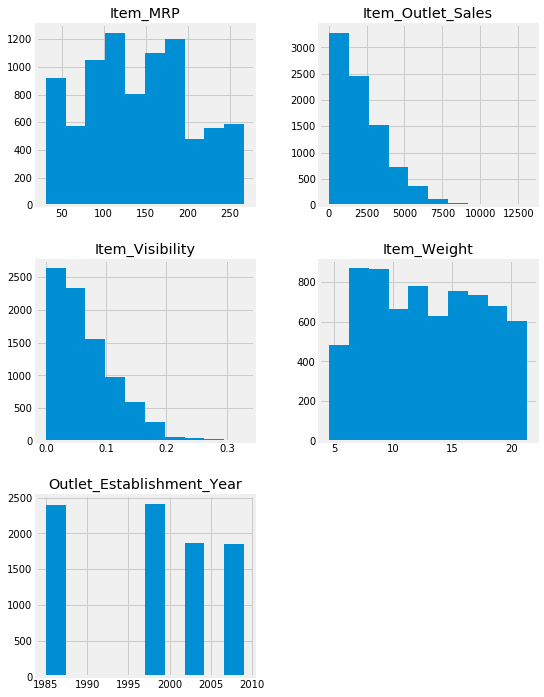

In [21]:
# Histogram overview
kaggle.hist(figsize=(8,12))

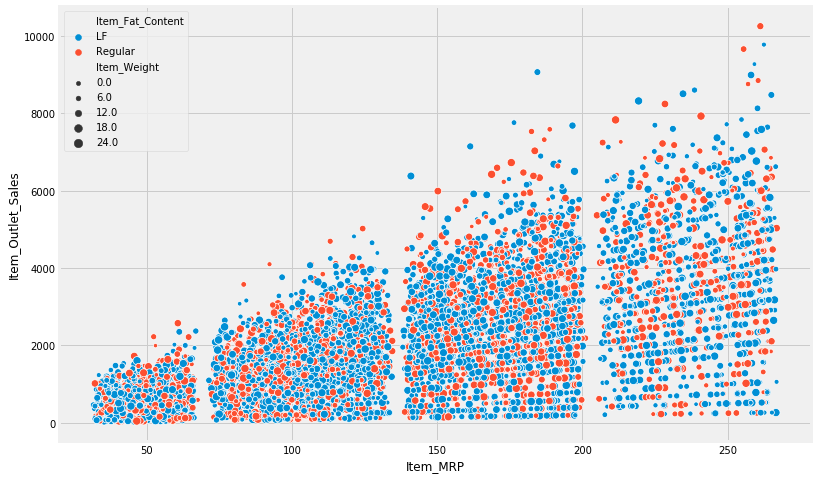

In [22]:
# Pandas scatterplot in highest two measurement in correlation
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size= 'Item_Weight',data=kaggle)

In [23]:
kaggle.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_MRP column contain prices which are in clusters so it would be better if we convert this columnn into bins for further processing.

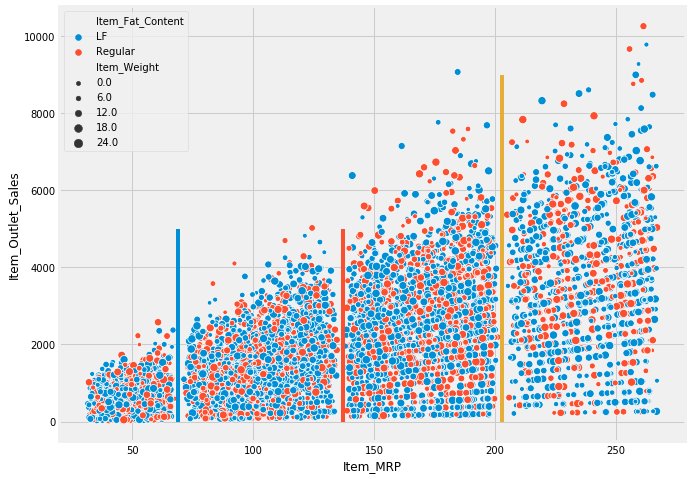

In [24]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=kaggle)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

We can use these perpendicular lines to divide data into proper bins. So from above graph we got out bin value

In [25]:
kaggle.Item_MRP=pd.cut(kaggle.Item_MRP,bins=[25,69,137,203,270],labels=['a','b','c','d'],right=True)
kaggle.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Now, let's explore other measurements

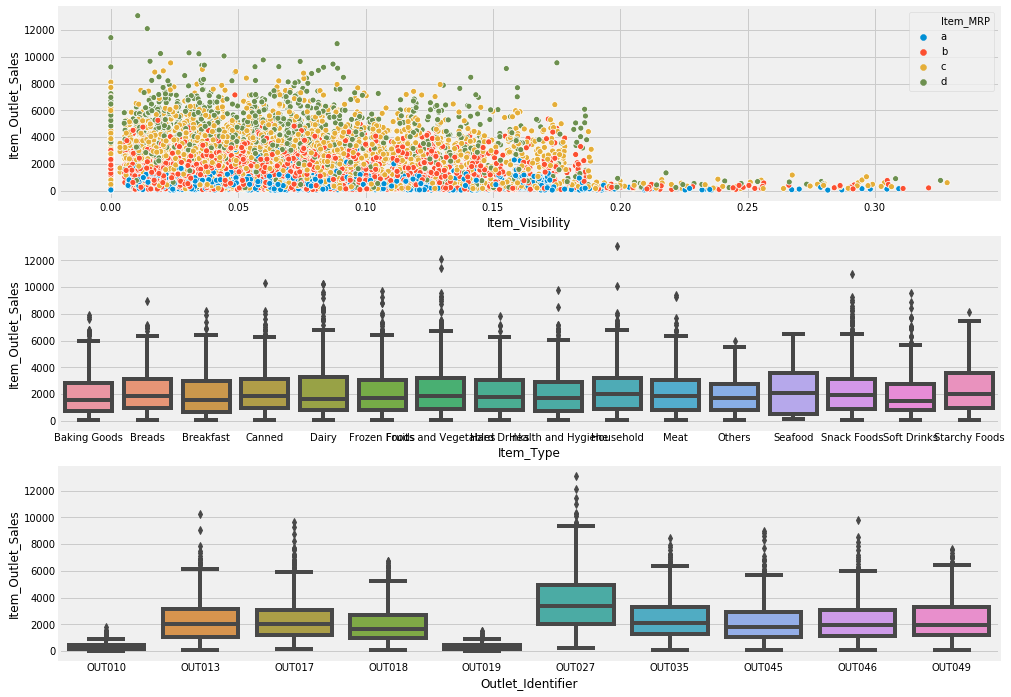

In [26]:
# Other measurements relationship
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=kaggle)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=kaggle)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=kaggle)

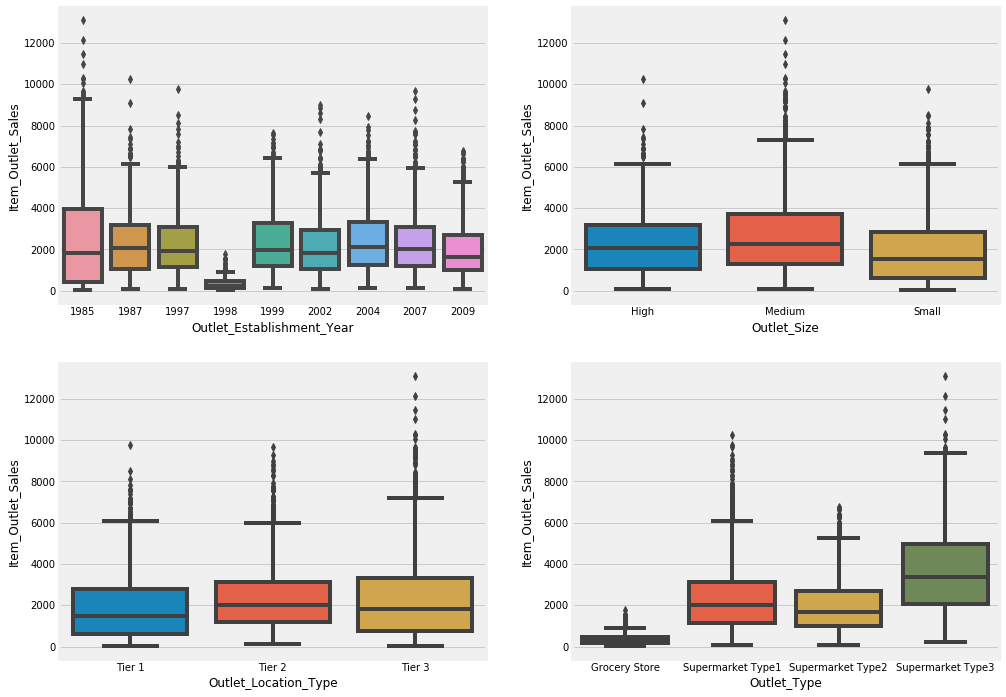

In [27]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=kaggle)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=kaggle)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=kaggle)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=kaggle)

### Chapter 4.3: Training the model

After trim the measurement of model training:

In [28]:
attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

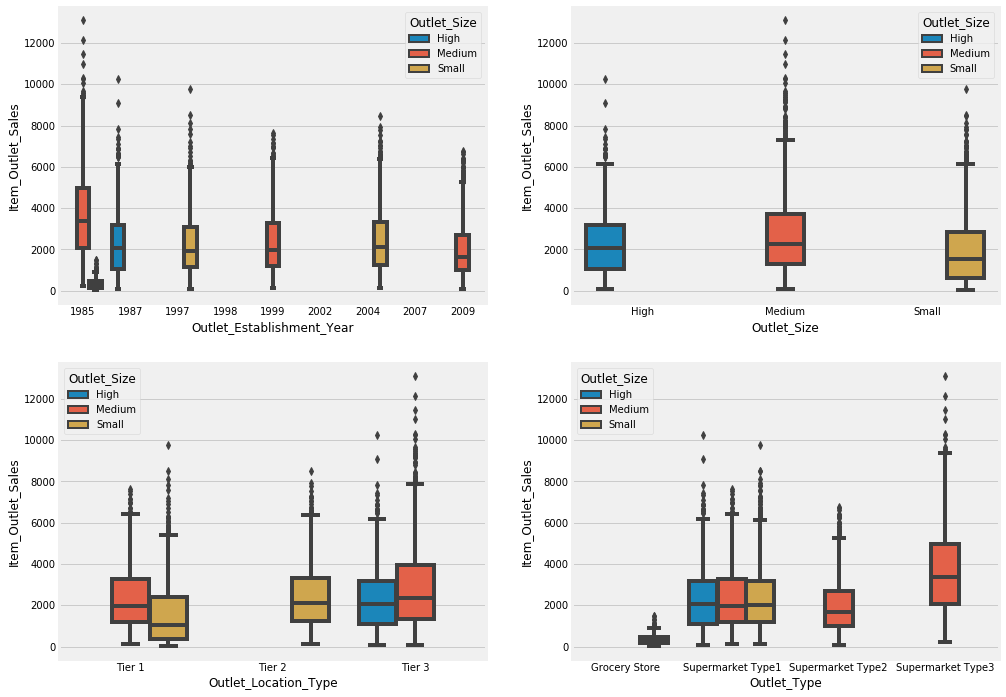

In [29]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=kaggle)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=kaggle)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=kaggle)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=kaggle)

In [32]:
data=kaggle[attributes]

In [33]:
data.info

<bound method DataFrame.info of      Item_MRP        Outlet_Type Outlet_Location_Type Outlet_Size  \
0           d  Supermarket Type1               Tier 1      Medium   
1           a  Supermarket Type2               Tier 3      Medium   
2           c  Supermarket Type1               Tier 1      Medium   
3           c      Grocery Store               Tier 3         NaN   
4           a  Supermarket Type1               Tier 3        High   
5           a  Supermarket Type2               Tier 3      Medium   
6           a  Supermarket Type1               Tier 3        High   
7           b  Supermarket Type3               Tier 3      Medium   
8           b  Supermarket Type1               Tier 2         NaN   
9           c  Supermarket Type1               Tier 2         NaN   
10          a  Supermarket Type1               Tier 1      Medium   
11          c  Supermarket Type1               Tier 1       Small   
12          c  Supermarket Type1               Tier 1      Medium   
13

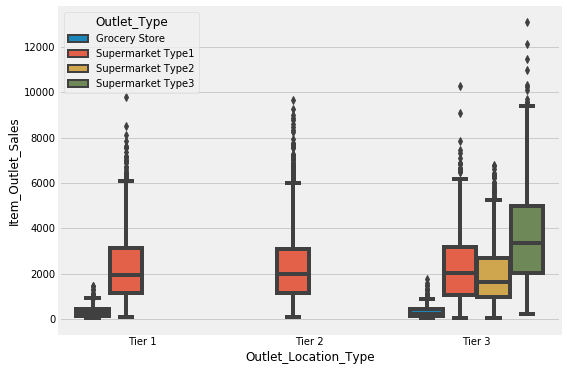

In [36]:
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type', data=data)

### Chapter 5: Evaluate some algorithm

### Chapter 6: Make prediction

### Chapter 7: Summary and Insights

### References:
- https://www.kaggle.com/devashish0507/big-mart-sales-prediction
